In [1]:
import sys
import os
import pandas as pd
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

In [2]:
# Aller au dossier racine du projet
project_root = os.path.abspath("..")  # Remonte au dossier principal du projet
src_path = os.path.join(project_root, "src")

# Ajouter le chemin src/ au path Python (évite les doublons)
if src_path not in sys.path:
    sys.path.append(src_path)

Pipeline de prédiction pour les modèles de régression

In [3]:
from ml_models.pipeline_for_regression import run_model

model, X_train, df_stats, df_test = run_model('catboost', use_feature_engineering=True, use_bet_odds=True)

c:\Users\Utilisateur\Desktop\Projets python\horse_racing\.env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<class 'pandas.core.frame.DataFrame'>
Index: 63531 entries, 0 to 5077
Data columns (total 44 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   venue                      63531 non-null  category
 1   config                     63531 non-null  category
 2   surface                    63531 non-null  category
 3   distance                   63531 non-null  category
 4   going                      63531 non-null  category
 5   horse_ratings              63531 non-null  category
 6   race_class                 63531 non-null  category
 7   horse_id                   63531 non-null  int64   
 8   horse_age                  63531 non-null  int64   
 9   horse_country              63531 non-null  category
 10  horse_type                 63531 non-null  category
 11  horse_rating               63531 non-null  category
 12  actual_weight              63531 non-null  int64   
 13  draw                       63531 non-

In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15916 entries, 5078 to 6348
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   venue                      15916 non-null  category
 1   config                     15916 non-null  category
 2   surface                    15916 non-null  category
 3   distance                   15916 non-null  category
 4   going                      15916 non-null  category
 5   horse_ratings              15916 non-null  category
 6   race_class                 15916 non-null  category
 7   horse_id                   15916 non-null  int64   
 8   result                     15916 non-null  int64   
 9   won                        15916 non-null  float64 
 10  horse_age                  15916 non-null  int64   
 11  horse_country              15916 non-null  category
 12  horse_type                 15916 non-null  category
 13  horse_rating               15916 n

In [5]:
df_test.head()

,venue,config,surface,distance,going,horse_ratings,race_class,horse_id,result,won,...,gear_OTHER,gear_P,gear_SR,gear_TT,gear_V,track_conditions,specialized_trainer,distance_vs_age,country_specificity,distance_vs_weight
race_id,,,,,,,,,,,,,,,,,,,,,
5078,ST,A,1,1650,GOOD,80-60,3,976,6,0.0,...,True,False,False,False,False,GOOD_1_A,9_110_60,1650_3,USA_Brown_80-60,1650_133
5078,ST,A,1,1650,GOOD,80-60,3,1598,7,0.0,...,False,False,False,False,False,GOOD_1_A,29_175_79,1650_7,IRE_Gelding_80-60,1650_130
5078,ST,A,1,1650,GOOD,80-60,3,1514,5,0.0,...,False,False,False,False,False,GOOD_1_A,27_138_76,1650_5,USA_Brown_80-60,1650_129
5078,ST,A,1,1650,GOOD,80-60,3,3673,8,0.0,...,False,False,False,True,False,GOOD_1_A,137_21_75,1650_6,GB_Gelding_80-60,1650_123
5078,ST,A,1,1650,GOOD,80-60,3,627,1,1.0,...,True,False,False,False,False,GOOD_1_A,55_2_75,1650_4,IRE_Rig_80-60,1650_128


In [6]:
df_stats.head(14)

,race_id,horse_id,won,y_predict,top_prediction,accuracy
0,5078,976,0,0.341674,0,False
1,5078,1598,0,0.111338,0,False
2,5078,1514,0,0.309518,0,False
3,5078,3673,0,0.270640,0,False
4,5078,627,1,0.595000,0,False
5,5078,1271,0,0.197944,0,False
6,5078,833,0,0.475801,0,False
7,5078,3751,0,0.293491,0,False
8,5078,1918,0,0.804127,1,False
9,5078,1615,0,0.431138,0,False


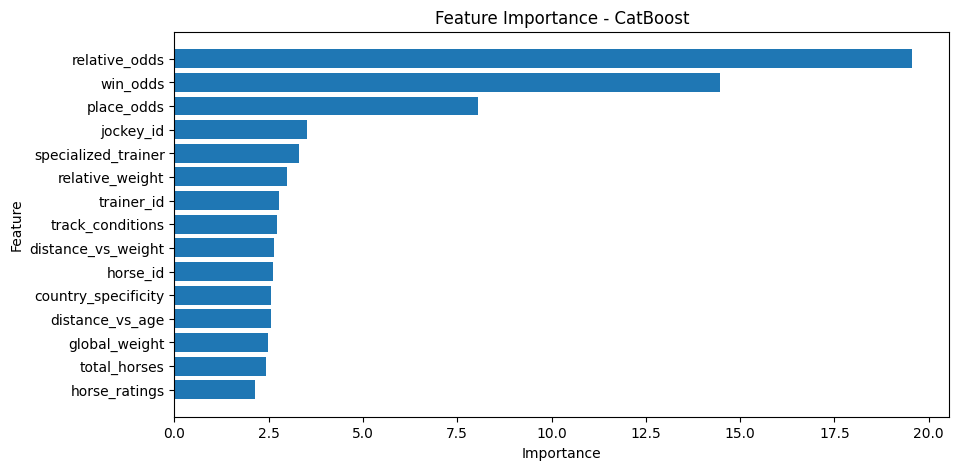

In [7]:
from metrics.feature_importance import plot_feature_importance

importance_df = plot_feature_importance(model, X_train)

XGBoost

In [8]:
#model, X_train, df_stats = run_model('xgboost', use_feature_engineering=True, use_bet_odds=True)

In [9]:
df_stats.head(14)

,race_id,horse_id,won,y_predict,top_prediction,accuracy
0,5078,976,0,0.341674,0,False
1,5078,1598,0,0.111338,0,False
2,5078,1514,0,0.309518,0,False
3,5078,3673,0,0.270640,0,False
4,5078,627,1,0.595000,0,False
5,5078,1271,0,0.197944,0,False
6,5078,833,0,0.475801,0,False
7,5078,3751,0,0.293491,0,False
8,5078,1918,0,0.804127,1,False
9,5078,1615,0,0.431138,0,False
